In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%config Completer.use_jedi = False

In [4]:
def get_fitness_df(df):
    fitness_col = [col for col in df if col.startswith('fitness')]
    df_fitness = df[fitness_col]
    return df_fitness

def get_time_df(df):
    fitness_col = [col for col in df if col.startswith('time')]
    df_fitness = df[fitness_col]
    return df_fitness

def get_fevals_df(df):
    fitness_col = [col for col in df if col.startswith('fevals')]
    df_fitness = df[fitness_col]
    return df_fitness

def plot_fitness(df_fitness, names={}, title="", save_as=None):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["fitness_" + name], label=label)
        
    plt.legend()
    plt.grid()
    
    if save_as:
        plt.savefig('images/'+save_as)
    
    plt.show()

def plot_time(df_fitness, names={}, title=""):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Time") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["time_" + name], label=label)
        
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_fevals(df_fitness, names={}, title=""):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Function Evals") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["fevals_" + name], label=label)
        
    plt.legend()
    plt.grid()
    plt.show()
    
def combine_csv(problem, names={}):
    # read first file so we can get indexes
    _first_file_name = list(names.keys())[0]
    df_read = pd.read_csv("ABAGAIL/jython/data/" + problem + "/"+ _first_file_name +".csv")
    df = pd.DataFrame(index = df_read["iters"])
    
    for name in names.keys():
        df_read = pd.read_csv("ABAGAIL/jython/data/"+ problem + "/" + name +".csv", index_col = "iters")
        df_read = df_read.add_suffix("_" + name)

        df = df.join(df_read)
        
    df.ffill(inplace= True)
    return df

In [5]:
def plot_max_fitness_bar(combined_df, names, title="", save_as=None):
    plt.title(title)
    plt.ylabel("Fitness Score")
    plt.ylabel("Algorithm") 
    x_labels = []
    y_values = []
    
    for name, label in names.items():
        max_fitness_index = combined_df["fitness_" + name].argmax()
        row = combined_df.iloc[max_fitness_index]
        max_fitness_value = row["fitness_" + name]
        
        x_labels.append(label)
        y_values.append(max_fitness_value)
        
        print(label, max_fitness_value)
        

    plt.bar(x_labels, y_values)
    
    if save_as:
        plt.savefig('images/'+save_as)
    
    plt.show()

In [6]:
def plot_max_time_bar(combined_df, names, title="", save_as=None):
    plt.title(title)
    plt.ylabel("Time (Seconds)")
    plt.ylabel("Algorithm") 
    x_labels = []
    y_values = []
    
    for name, label in names.items():
        max_fitness_index = combined_df["fitness_" + name].argmax()
        row = combined_df.iloc[max_fitness_index]
        max_time_value = row["time_" + name]
        
        x_labels.append(label)
        y_values.append(max_time_value)
        
        print(label, max_time_value)
        
    bars = plt.bar(x_labels, y_values)
    
    # Set bar color
    for bar in bars:
        bar.set_color('green')

    if save_as:
        plt.savefig('images/'+save_as)
        
    plt.show()

# Tune RHC

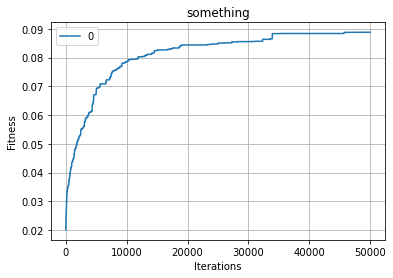

In [16]:
files = {
    "exp00-RHC-0"    : "0",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:50000], files, title="something")

# Tune SA

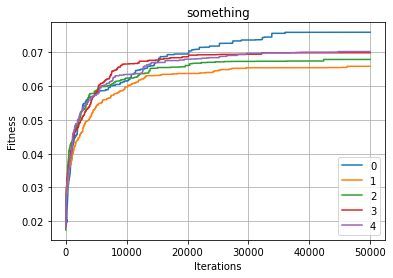

In [17]:
files = {
    "exp01-SA-0"    : "0",
    "exp01-SA-1"    : "1",
    "exp01-SA-2"    : "2",
    "exp01-SA-3"    : "3",
    "exp01-SA-4"    : "4",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:50000], files, title="something")

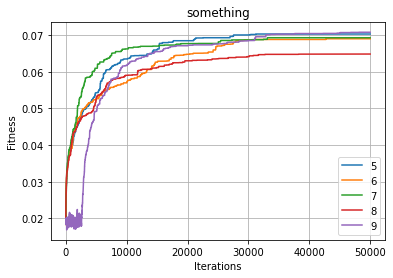

In [18]:
files = {
    "exp01-SA-5"    : "5",
    "exp01-SA-6"    : "6",
    "exp01-SA-7"    : "7",
    "exp01-SA-8"    : "8",
    "exp01-SA-9"    : "9",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:50000], files, title="something")

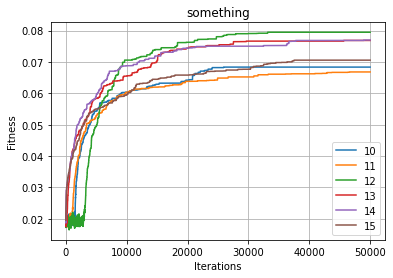

In [21]:
files = {
    "exp01-SA-10"    : "10",
    "exp01-SA-11"    : "11",
    "exp01-SA-12"    : "12",
    "exp01-SA-13"    : "13",
    "exp01-SA-14"    : "14",
    "exp01-SA-15"    : "15",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:50000], files, title="something")

# Best SA  

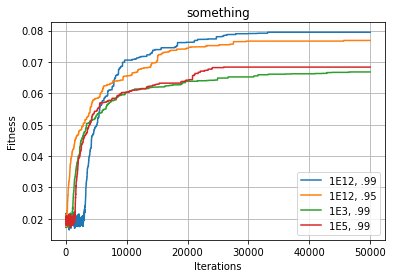

In [23]:
files = {
    "exp01-SA-12"    : "1E12, .99",
    "exp01-SA-13"    : "1E12, .95",
    "exp01-SA-11"    : "1E3, .99",
    "exp01-SA-10"    : "1E5, .99",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:50000], files, title="something")

# Tune MIMIC

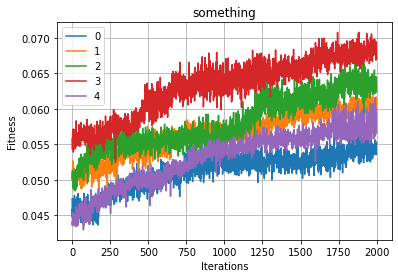

In [24]:
files = {
    "exp02-MIMIC-0"    : "0",
    "exp02-MIMIC-1"    : "1",
    "exp02-MIMIC-2"    : "2",
    "exp02-MIMIC-3"    : "3",
    "exp02-MIMIC-4"    : "4",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:10000], files, title="something")

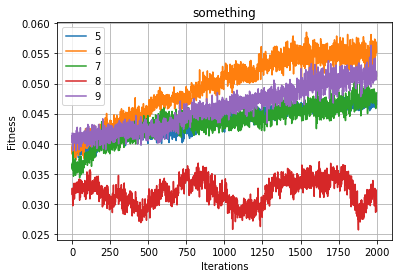

In [25]:
files = {
    "exp02-MIMIC-5"    : "5",
    "exp02-MIMIC-6"    : "6",
    "exp02-MIMIC-7"    : "7",
    "exp02-MIMIC-8"    : "8",
    "exp02-MIMIC-9"    : "9",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:10000], files, title="something")

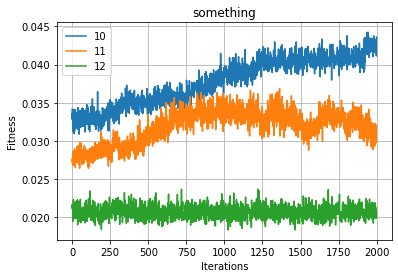

In [26]:
files = {
    "exp02-MIMIC-10"   : "10",
    "exp02-MIMIC-11"   : "11",
    "exp02-MIMIC-12"   : "12",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:10000], files, title="something")

# Best Mimic Params

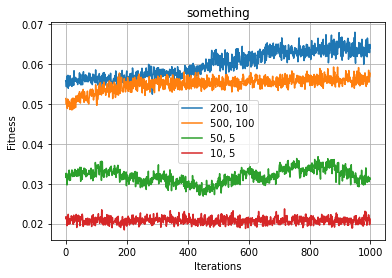

In [31]:
files = {
    "exp02-MIMIC-3"    : "200, 10",
    "exp02-MIMIC-2"    : "500, 100",
    "exp02-MIMIC-8"    : "50, 5",
     "exp02-MIMIC-12"   : "10, 5",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:1000], files, title="something")

# Tune GA

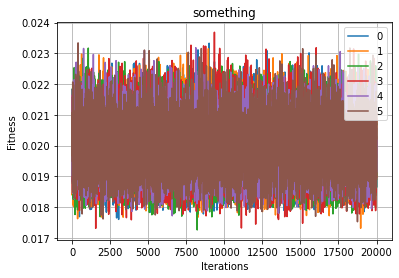

In [54]:
files = {
    "exp03-GA-0"    : "0",
    "exp03-GA-1"    : "1",
    "exp03-GA-2"    : "2",
    "exp03-GA-3"    : "3",
    "exp03-GA-4"    : "4",
    "exp03-GA-5"    : "5",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:20000], files, title="something")

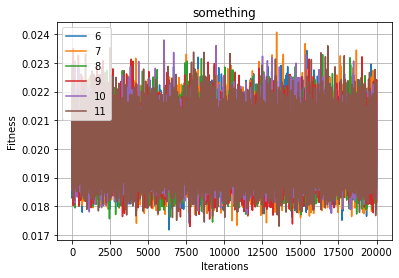

In [55]:
files = {
    "exp03-GA-6"    : "6",
    "exp03-GA-7"    : "7",
    "exp03-GA-8"    : "8",
    "exp03-GA-9"    : "9",
    "exp03-GA-10"    : "10",
    "exp03-GA-11"    : "11",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:20000], files, title="something")

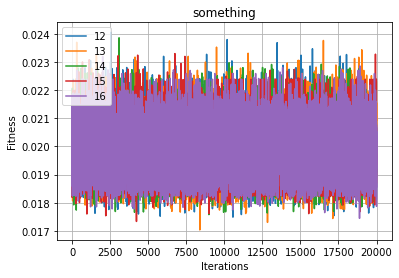

In [56]:
files = {
    "exp03-GA-12"    : "12",
    "exp03-GA-13"    : "13",
    "exp03-GA-14"    : "14",
    "exp03-GA-15"    : "15",
    "exp03-GA-16"    : "16",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:20000], files, title="something")

# Best GA 

In [52]:
# files = {
#     "exp03-GA-4"    : "200, 50, 25",
#     "exp03-GA-5"    : "200, 50, 10",
#     "exp03-GA-6"    : "200, 50, 5",
# }

# df_test = combine_csv("tsp", files)

# ft_df = get_fitness_df(df_test)

# fe_df = get_fevals_df(df_test)
# t_df = get_time_df(df_test)

# # ft_df
# plot_fitness(ft_df[:1000], files, title="something")

# All Best Algos

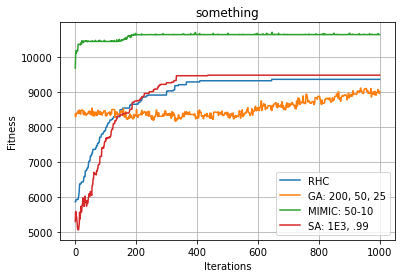

In [53]:
# files = {
#     "exp01-RHC-1"    : "RHC",
#     "exp03-GA-4"    : "GA: 200, 50, 25",
#     "exp00-MIMIC-18" : "MIMIC: 50-10",
#     "exp02-SA-11"    : "SA: 1E3, .99",
# }

# df_test = combine_csv("tsp", files)

# ft_df = get_fitness_df(df_test)

# fe_df = get_fevals_df(df_test)
# t_df = get_time_df(df_test)

# # ft_df
# plot_fitness(ft_df[:1000], files, title="something")

RHC 9357.726611630796
GA: 200, 50, 25 9107.946113599113
MIMIC: 50-10 10703.164826444194
SA: 1E3, .99 9476.650174998846


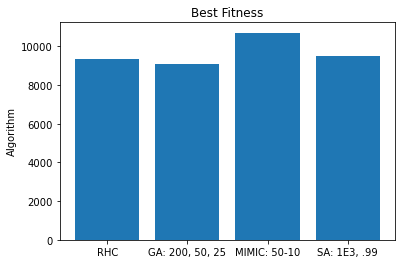

In [83]:
# plot_max_fitness_bar(df_test[:1000], files, title="Best Fitness")

RHC 0.07899999618530272
GA: 200, 50, 25 0.23399996757507324
MIMIC: 50-10 9.460000038146973
SA: 1E3, .99 0.009999990463256836


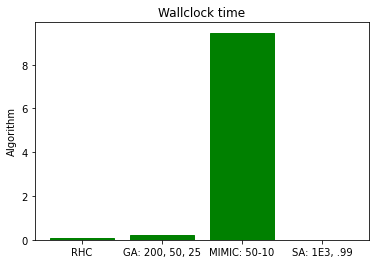

In [84]:
# plot_max_time_bar(df_test[:1000], files, title="Wallclock time", save_as="N100 time.png")

# Small Problem Size (N=50)

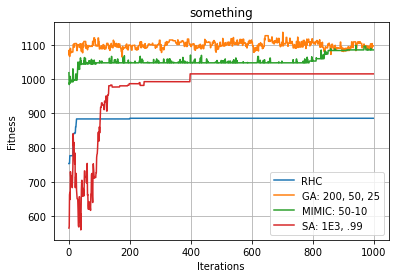

In [85]:
# files = {
#     "exp04-RHC-0"    : "RHC",
#     "exp04-GA-0"    : "GA: 200, 50, 25",
#     "exp04-MIMIC-0" : "MIMIC: 50-10",
#     "exp04-SA-0"    : "SA: 1E3, .99",
# }

# df_test = combine_csv("tsp", files)

# ft_df = get_fitness_df(df_test)

# fe_df = get_fevals_df(df_test)
# t_df = get_time_df(df_test)

# # ft_df
# plot_fitness(ft_df[:1000], files, title="something")

# Small Problem Size (N=200)

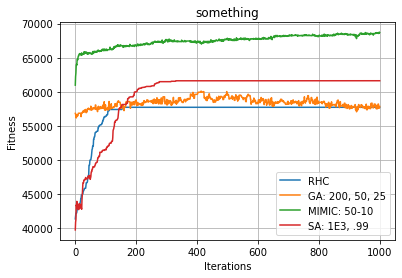

In [86]:
# files = {
#     "exp05-RHC-0"    : "RHC",
#     "exp05-GA-0"    : "GA: 200, 50, 25",
#     "exp05-MIMIC-0" : "MIMIC: 50-10",
#     "exp05-SA-0"    : "SA: 1E3, .99",
# }

# df_test = combine_csv("tsp", files)

# ft_df = get_fitness_df(df_test)

# fe_df = get_fevals_df(df_test)
# t_df = get_time_df(df_test)

# # ft_df
# plot_fitness(ft_df[:1000], files, title="something")